# Week 5

## Imports

In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston, load_digits, load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR, SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

/opt/anaconda3/envs/inclassEnv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/envs/inclassEnv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Load Data

In [35]:
boston = load_boston()

x, y = boston.data, boston.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.33, random_state=32)

scale = MinMaxScaler(feature_range=(-1,1)).fit(x_train)

x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

## Setup model and test using cross fold validation

In [36]:
svr = SVR(C=100, kernel='poly', degree=3)

cv = cross_val_score(svr, x_train, y_train,cv=10)

print("Mean",cv.mean())
print("STD", cv.std())

Mean 0.8475183461087458
STD 0.07442218647259267


## Train and test model

In [26]:
model = svr.fit(x_train, y_train)

score = model.score(x_test, y_test)

score

0.84511567910487

## MNIST digits

X before transform: 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


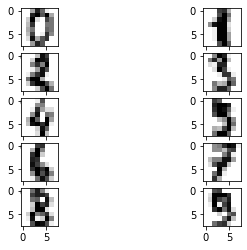

In [41]:
digits = load_digits()

x, y = digits.data, digits.target

print("X before transform: \n",x[0])

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(digits.images[i], cmap='binary', interpolation='none')

plt.show()

## Distribution

In [42]:
uniques = np.unique(y, return_counts=True)

print("Uniques and counts: ",uniques)

Uniques and counts:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))


## Create Testing Data and Scale

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=32)

scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)

x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

## Create Model and Test

In [65]:
svc = SVC(class_weight="balanced", kernel='poly', C=100, degree=2)


cv = cross_val_score(svc, x_train, y_train, cv=10)


print('Values', cv)
print('Avg ' , cv.mean())
print('Std ' , cv.std())

Values [0.98347107 0.99173554 0.96694215 1.         1.         0.99166667
 0.98333333 0.99166667 0.98333333 0.975     ]
Avg  0.9867148760330577
Std  0.009943980654350086


## Train model and show CM

In [66]:
model = svc.fit(x_train, y_train)

score = model.score(x_test, y_test)

print('Score', score)

y_pred = model.predict(x_test)


cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

cm

Score 0.98989898989899


,0,1,2,3,4,5,6,7,8,9
0,51,0,0,0,0,0,0,0,0,0
1,0,65,0,0,0,0,0,0,0,0
2,0,0,50,0,0,0,0,0,0,0
3,0,0,0,79,0,0,0,0,0,0
4,0,0,0,0,56,0,0,0,0,0
5,0,0,0,0,0,58,0,0,0,2
6,0,0,0,0,0,0,61,0,0,0
7,0,0,0,0,0,1,0,60,0,1
8,0,1,0,0,0,0,0,0,44,0
9,0,0,0,0,0,0,0,1,0,64


## IRIS dataset

In [89]:
iris = load_iris()

x = pd.DataFrame(iris.data)
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

#print(x_train)

scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)

x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

#print(x_train)

svm = LinearSVC(C=100000, max_iter=1000000)

svm.fit(x_train, y_train)

print(svm.score(x_test,y_test))

y_pred = svm.predict(x_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

cm

0.9777777777777777


,0,1,2
0,16,0,0
1,0,17,1
2,0,0,11


# Encoding

In [91]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labels = np.array(['cat', 'dog', 'cat', 'cow', 'ant'])

labels = labels[:, np.newaxis]

labels

array([['cat'],
       ['dog'],
       ['cat'],
       ['cow'],
       ['ant']], dtype='<U3')

## LabelEncoder

In [92]:
enc = LabelEncoder()

encoded = enc.fit_transform(labels)

print(encoded)

[1 3 1 2 0]


/opt/anaconda3/envs/inclassEnv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [94]:
decoded = enc.inverse_transform([3])

print(decoded)

['dog']


## One Hot Encoder

In [95]:
enc = OneHotEncoder()

encoded = enc.fit_transform(labels)

print(encoded)

  (0, 1)	1.0
  (1, 3)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 0)	1.0


In [96]:
decoded = enc.inverse_transform([[0,0,0,1]])

print(decoded)

[['ant']]
